In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Ciudad": ["Bogotá", "Medellín", "Cali", "Barranquilla", "Bogotá", "Cali", "Medellín", "Cartagena"],
    "Genero": ["M", "F", "F", "M", "M", "F", "M", "F"],
    "Edad": [22, 35, 29, 42, 18, 33, 27, 30],
    "Ingresos": [2500000, 3500000, 4200000, 1800000, 1500000, 5000000, 3200000, 4000000],
    "Fecha": pd.date_range(start="2024-01-01", periods=8, freq="M")
}

df = pd.DataFrame(data)
df


/tmp/ipython-input-332652216.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Fecha": pd.date_range(start="2024-01-01", periods=8, freq="M")


,Ciudad,Genero,Edad,Ingresos,Fecha
0,Bogotá,M,22,2500000,2024-01-31
1,Medellín,F,35,3500000,2024-02-29
2,Cali,F,29,4200000,2024-03-31
3,Barranquilla,M,42,1800000,2024-04-30
4,Bogotá,M,18,1500000,2024-05-31
5,Cali,F,33,5000000,2024-06-30
6,Medellín,M,27,3200000,2024-07-31
7,Cartagena,F,30,4000000,2024-08-31


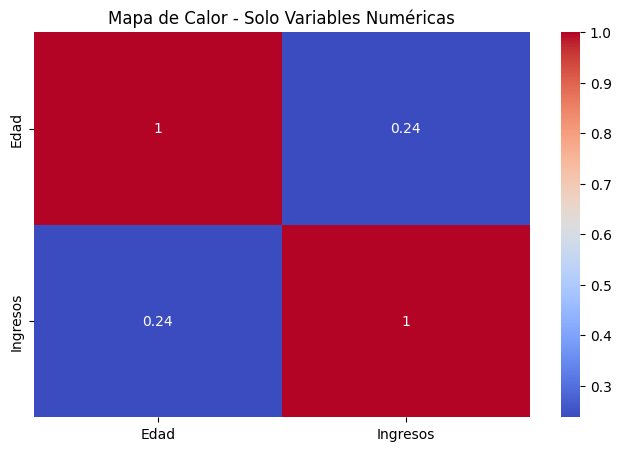

In [2]:
#Mapa de Calor - Variables Númericas
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),
            annot=True, cmap="coolwarm")
plt.title("Mapa de Calor - Solo Variables Numéricas")
plt.show()


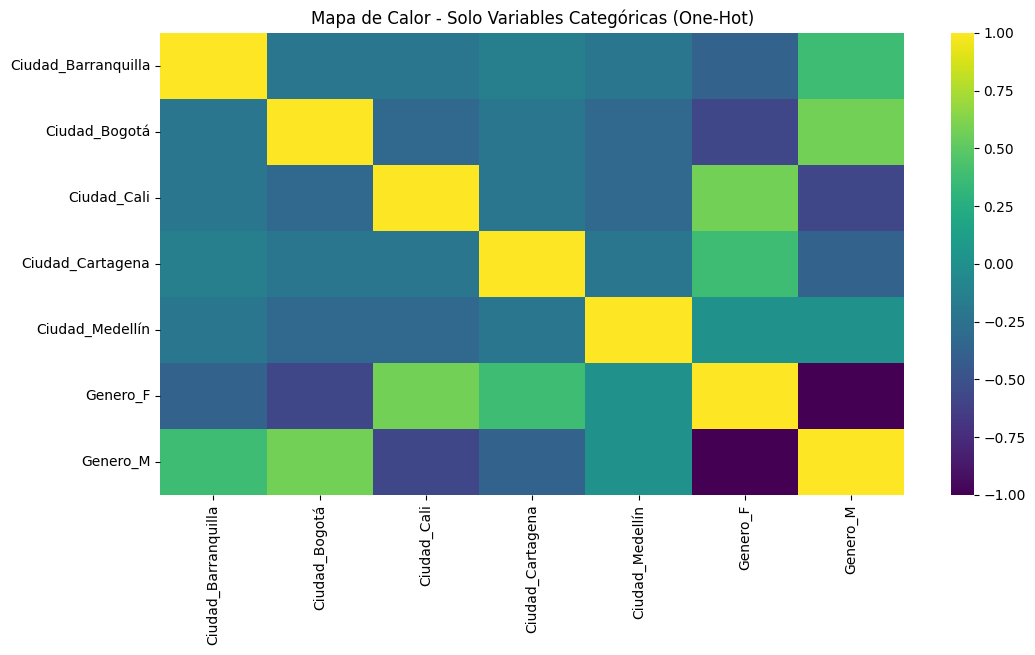

In [3]:
#Mapa de Calor - Variables Categoricas
df_cat = pd.get_dummies(df.select_dtypes(include=["object"]))
plt.figure(figsize=(12,6))
sns.heatmap(df_cat.corr(), cmap="viridis")
plt.title("Mapa de Calor - Solo Variables Categóricas (One-Hot)")
plt.show()


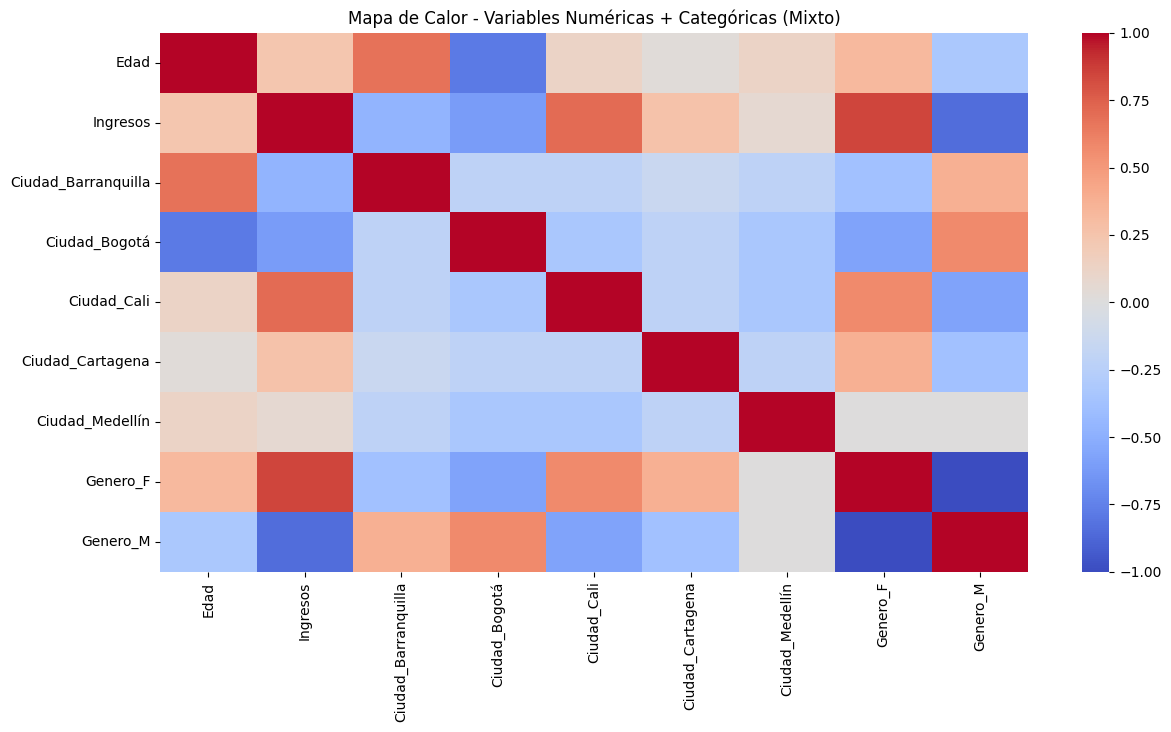

In [5]:
#Mapa de Calor - Variables categoricas y numericas
df_mixto = pd.concat([
    df.select_dtypes(include=[np.number]),
    pd.get_dummies(df.select_dtypes(include=["object"]))
], axis=1)

plt.figure(figsize=(14,7))
sns.heatmap(df_mixto.corr(), cmap="coolwarm")
plt.title("Mapa de Calor - Variables Numéricas + Categóricas (Mixto)")
plt.show()

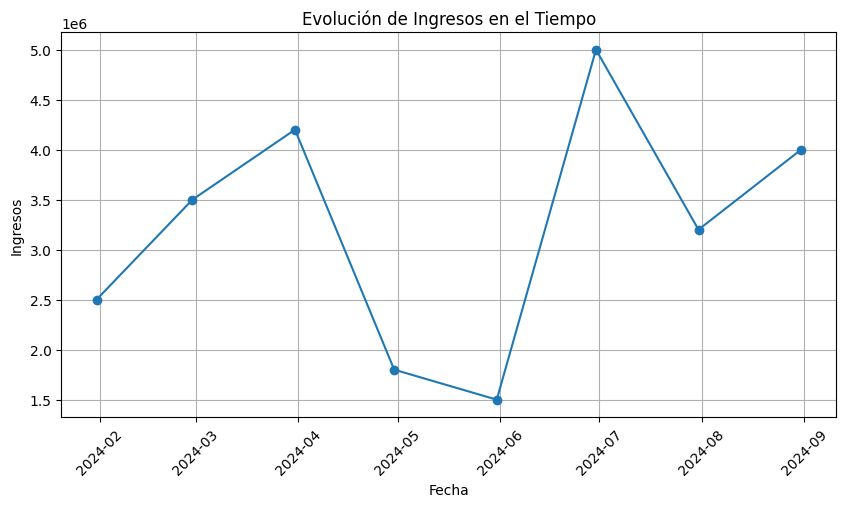

In [7]:
#Grafico de Lineas - Fechas
plt.figure(figsize=(10,5))
plt.plot(df["Fecha"], df["Ingresos"], marker="o")
plt.xlabel("Fecha")
plt.ylabel("Ingresos")
plt.title("Evolución de Ingresos en el Tiempo")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [12]:
# Mapar Latitud - Longitud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Define approximate coordinates for each city in the dataset
city_coordinates = {
    "Bogotá": [4.7110, -74.0721],
    "Medellín": [6.2442, -75.5812],
    "Cali": [3.4516, -76.5320],
    "Barranquilla": [10.9685, -74.7813],
    "Cartagena": [10.3910, -75.4794]
}

# Add 'Latitud' and 'Longitud' columns to the DataFrame
df['Latitud'] = df['Ciudad'].map(lambda x: city_coordinates.get(x, [np.nan, np.nan])[0])
df['Longitud'] = df['Ciudad'].map(lambda x: city_coordinates.get(x, [np.nan, np.nan])[1])

# Crear mapa centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=5)

# Añadir puntos del dataset
for i, row in df.iterrows():
    # Only add marker if Latitud and Longitud are not NaN
    if not pd.isna(row['Latitud']) and not pd.isna(row['Longitud']):
        folium.Marker(
            location=[row["Latitud"], row["Longitud"]],
            popup=f"{row['Ciudad']} - Ingresos: {row['Ingresos']:,}"
        ).add_to(mapa)

mapa